In [2]:
import pandas as pd

df = pd.read_csv('IBM_HR_Employee_Attrition.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [3]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

In [4]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
df.fillna(method='ffill', inplace=True)

C:\Users\DIYA\AppData\Local\Temp\ipykernel_12156\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
df['PromotionGap'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']
df['StagnancyIndex'] = (df['YearsInCurrentRole'] + df['PromotionGap'] + df['YearsWithCurrManager']) / 3
df['SatisfactionScore'] = df[['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']].mean(axis=1)
df['IncomePerYear'] = df['MonthlyIncome'] / (df['TotalWorkingYears'] + 1)
df['IsOverworked'] = ((df['OverTime_Yes'] == 1) & (df['BusinessTravel_Travel_Frequently'] == 1)).astype(int)

In [8]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PromotionGap,StagnancyIndex,SatisfactionScore,IncomePerYear,IsOverworked
0,41,1,1102,1,2,2,94,3,2,4,...,True,False,False,True,True,6,5.000000,2.333333,665.888889,0
1,49,0,279,8,1,3,61,2,2,2,...,False,False,True,False,False,9,7.666667,3.000000,466.363636,0
2,37,1,1373,2,2,4,92,2,1,3,...,False,False,False,True,True,0,0.000000,3.000000,261.250000,0
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,True,False,True,5,4.000000,3.333333,323.222222,1
4,27,0,591,2,1,1,40,3,1,2,...,False,False,True,False,False,0,1.333333,2.333333,495.428571,0


In [20]:
df.to_csv('cleaned_hr_data.csv', index=False)

C:\Users\DIYA\AppData\Local\Temp\ipykernel_12156\2065165669.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


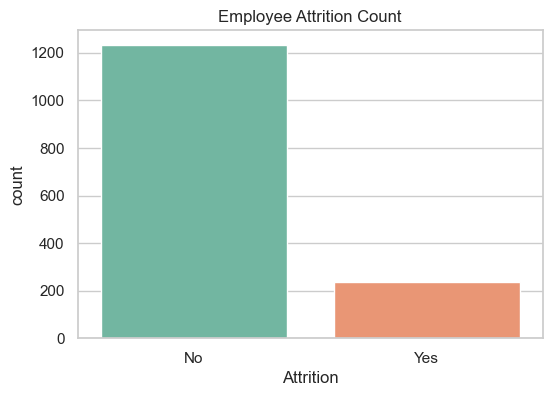

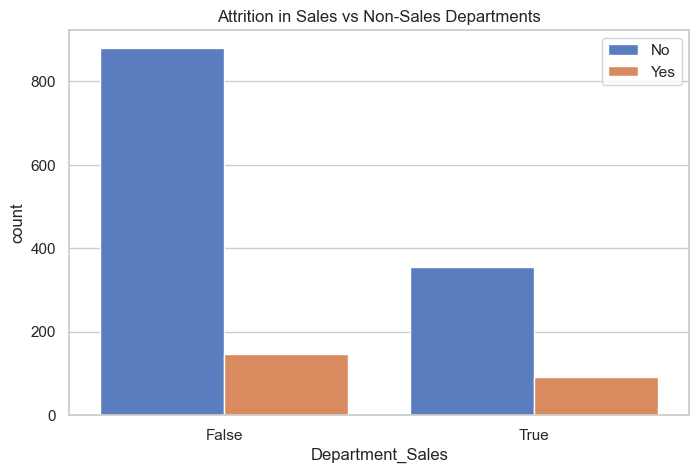

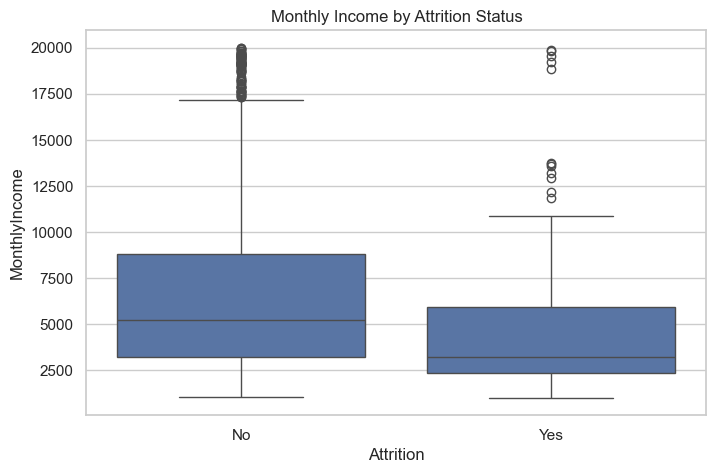

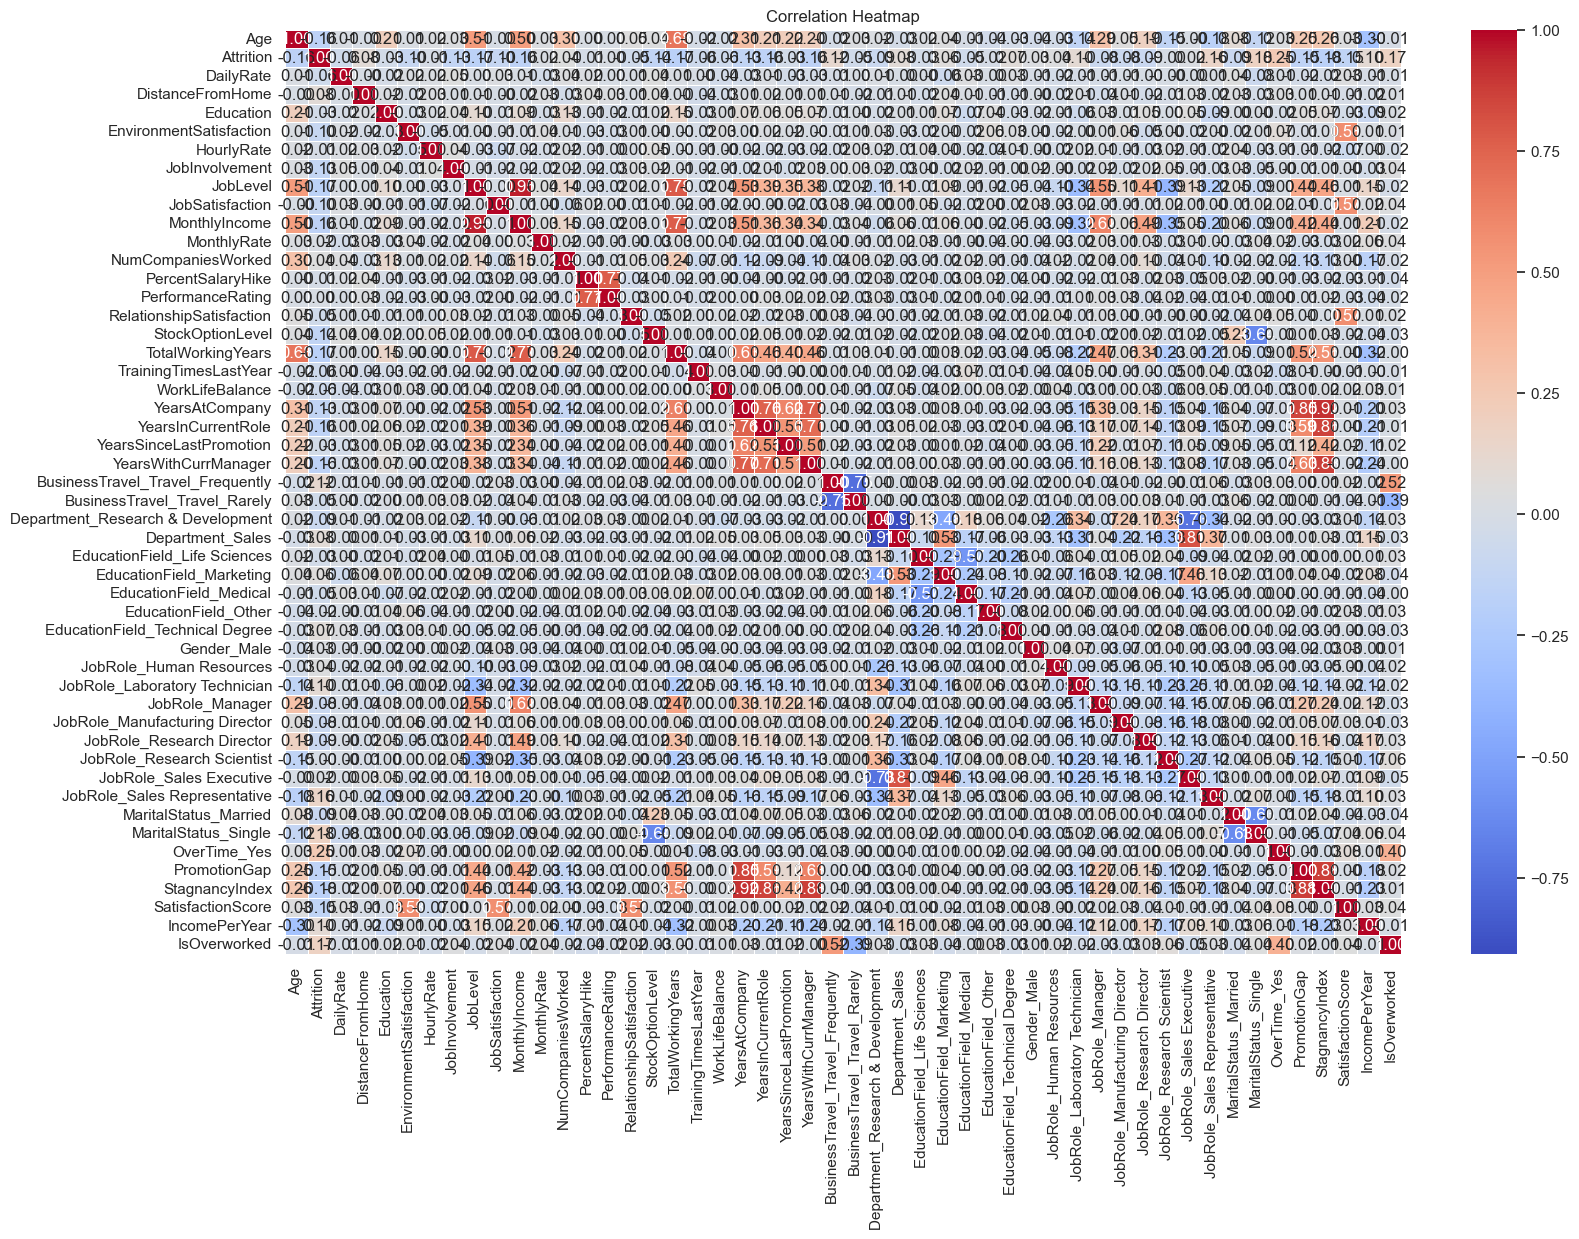

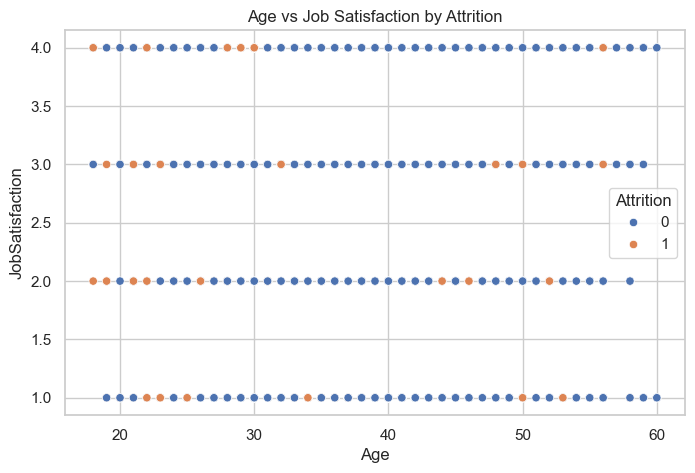

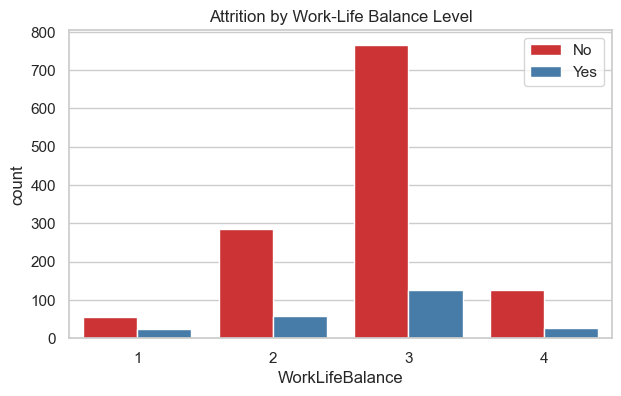

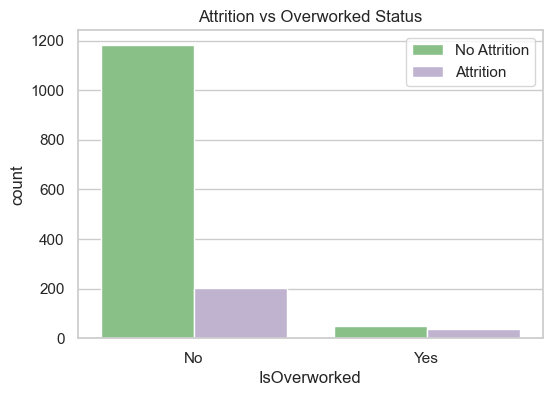

C:\Users\DIYA\AppData\Local\Temp\ipykernel_12156\2065165669.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


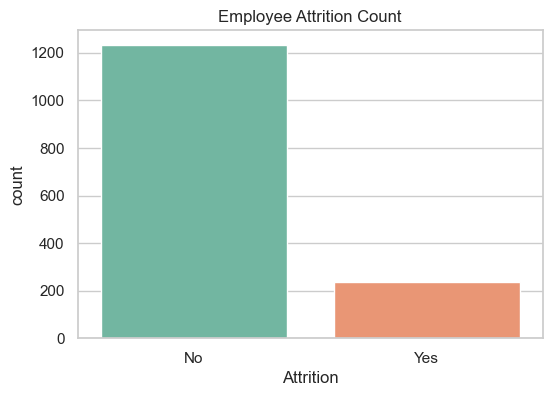

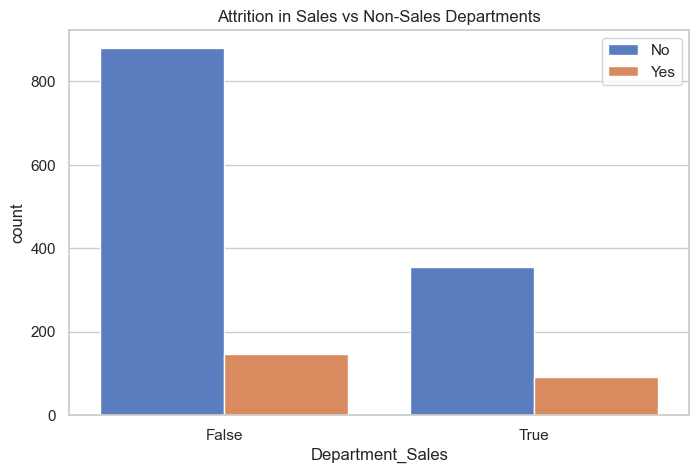

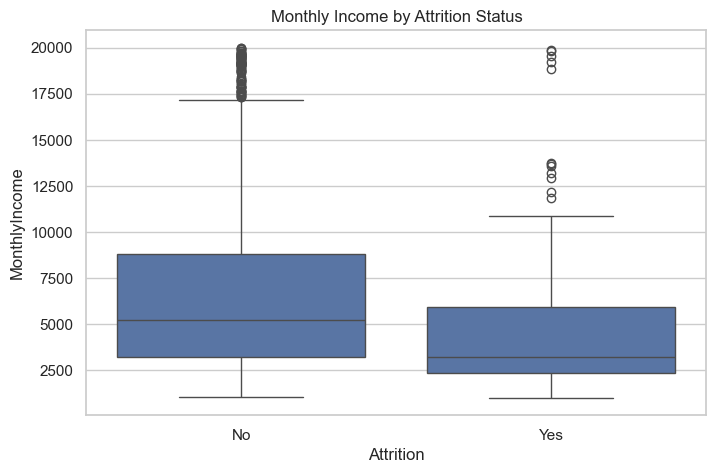

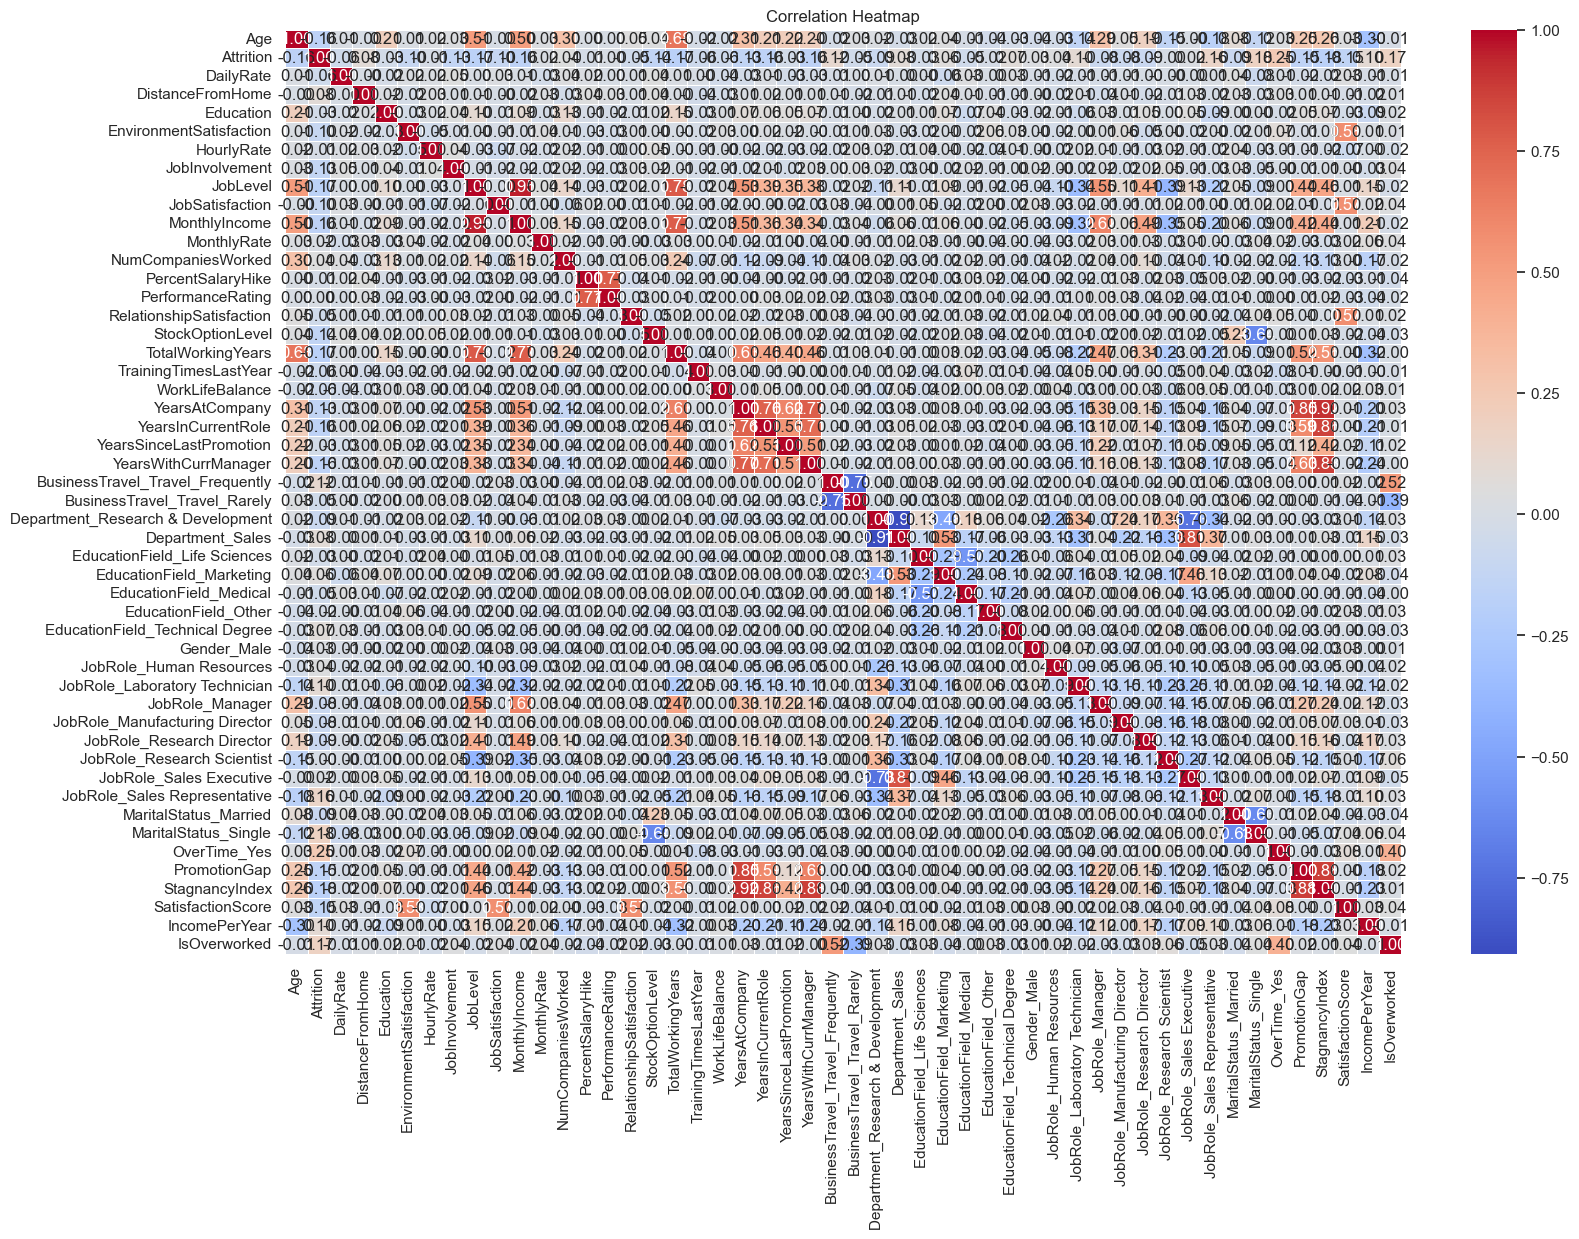

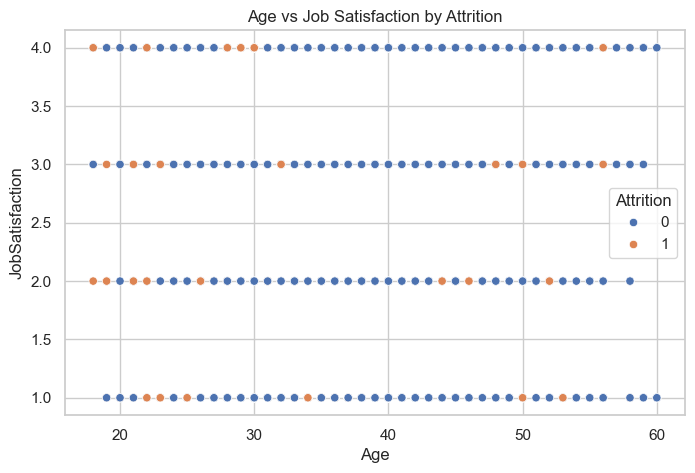

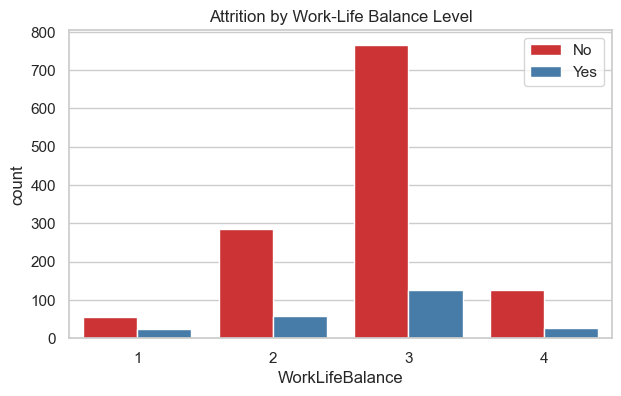

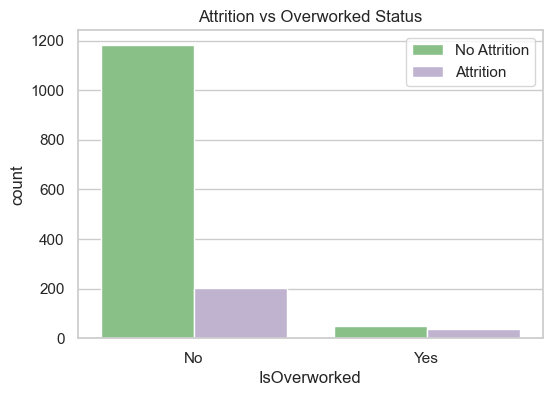

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_hr_data.csv")

sns.set(style="whitegrid")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_hr_data.csv")
sns.set(style="whitegrid")

# 1. Attrition count
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title("Employee Attrition Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 2. Department vs Attrition
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Department_Sales', hue='Attrition', palette='muted')
plt.title("Attrition in Sales vs Non-Sales Departments")
plt.legend(['No', 'Yes'])
plt.show()

# 3. Boxplot: MonthlyIncome vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Attrition Status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 4. Heatmap of Correlations
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 5. Scatterplot: Age vs JobSatisfaction
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='JobSatisfaction', hue='Attrition', data=df, palette='deep')
plt.title("Age vs Job Satisfaction by Attrition")
plt.show()

# 6. Work-Life Balance vs Attrition
plt.figure(figsize=(7, 4))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='Set1')
plt.title("Attrition by Work-Life Balance Level")
plt.xticks([0, 1, 2, 3], ['1', '2', '3', '4'])
plt.legend(['No', 'Yes'])
plt.show()

# 7. IsOverworked vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='IsOverworked', hue='Attrition', data=df, palette='Accent')
plt.title("Attrition vs Overworked Status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(['No Attrition', 'Attrition'])
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title("Employee Attrition Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 2. Department vs Attrition
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Department_Sales', hue='Attrition', palette='muted')
plt.title("Attrition in Sales vs Non-Sales Departments")
plt.legend(['No', 'Yes'])
plt.show()

# 3. Boxplot: MonthlyIncome vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Attrition Status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 4. Heatmap of Correlations
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 5. Scatterplot: Age vs JobSatisfaction
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='JobSatisfaction', hue='Attrition', data=df, palette='deep')
plt.title("Age vs Job Satisfaction by Attrition")
plt.show()

# 6. Work-Life Balance vs Attrition
plt.figure(figsize=(7, 4))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='Set1')
plt.title("Attrition by Work-Life Balance Level")
plt.xticks([0, 1, 2, 3], ['1', '2', '3', '4'])
plt.legend(['No', 'Yes'])
plt.show()

# 7. IsOverworked vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='IsOverworked', hue='Attrition', data=df, palette='Accent')
plt.title("Attrition vs Overworked Status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(['No Attrition', 'Attrition'])
plt.show()
